###### Material desenvolvido para o minicurso: Introdução à solução numérica de EDP's, ministrado no ERMAC/2018 de 5 a 6 de abril de 2018 na Universidade Federal de Lavras, Lavras/MG, Brasil. Autor: [Jonas Laerte Ansoni](http://jonasansoni.blogspot.com.br/).

<img src="./figuras/logoemarc.png" width="30%">

# <center> Minicurso:<font color='blue'> Introdução à solução numérica de EDP's

## <center> Equação parabólica
    
### Equação transiente de difusão de calor    
######  Olhar Fortuna página 113

A equação clássica para problemas parabólicos é a equação transiente de difusão de calor:

\begin{equation}
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}
\tag{1}
\end{equation}

onde, $\alpha$ é o ceficiente de difusividade térmica (propriedade do material), e $T$ é a temperatura.

Na lição anterior, vimos a solução numérica da equação de difusão 1D com um esquema progressivo no temo e centrado no espaço: um esquema _explícito_. O que isso significa?

A solução para $T$ em timestep $t^{n + 1}$ foi calculada usando diferentes combinações de valores de $T$ do timestep *anterior* $t^n$. Temos conhecimento completo das partes que alimentam a atualização da solução em cada ponto espacial.

*Os métodos implícitos* funcionam de maneira diferente: usaremos mais dados do "futuro" na atualização, incluindo vários valores de $T$ em $t^{n + 1}$. Isso tornará o esquema mais difícil de se aplicar, mas existem várias razões pelas quais pode valer a pena o esforço.

Na lição anterior, discutimos duas desvantagens dos métodos explícitos: (1) efeitos de fronteira arrastados para trás por um passo de tempo; (2) os requisitos de estabilidade restringem o intervalo de tempo a valores muito pequenos. Ambas as questões são resolvidas por esquemas implícitos.

#### 3.2.3 Esquemas implícitos

Ao contrário das discretizações explícitas, nos métodos implícitos as derivadas espaciais são discretizadas no nível de tempo $n+1$. Como exemplo, ao discretizarmos a derivada espacial por diferenças centrais de segunda ordem e a derivada temporal por diferenças atrasadas de primeira ordem temos:

\begin{equation}
\label{eq1}
\frac{T_{i}^{n+1}-T_{i}^{n}}{\Delta t}=\alpha\frac{T_{i+1}^{n+1}-2T_{i}^{n+1}+T_{i-1}^{n+1}}{\Delta x^2}+{\mathcal O}[(\Delta t),(\Delta x)^2]
\tag{1}
\end{equation}

O estêncil para esta discretização não se parece em nada com os outros estênceis que usamos até agora. Confira.

![stencil-implicitcentral](./figuras/stencil-implicitcentral.png)
#### <center> Figure 1. Estêncil para o esquema implícito da Eq. \ref{eq1}.

Do passo no tempo anterior, conhecemos apenas $T_i^{n}$, mas os outros termos $T_i^{n+1}$, $T_{i-1}^{n+1}$ and $T_{i+1}^{n+1}$?  Como podemos calcular?

Não precisa entrar em pânico! Vamos começar colocando o que *conhecemos* no lado direito da equação e o que *não conhecemos* à esquerda. Nós temos então:

\begin{equation} -T_{i-1}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{i}^{n+1} - T_{i+1}^{n+1} = T_{i}^{n}\frac{\Delta x^2}{\alpha\Delta t} \end{equation} 

Parece que há muitas incógnitas e apenas uma equação!

Com o que se parece com $i = 1$?

\begin{equation}-T_{0}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{1}^{n+1} - T_{2}^{n+1} = T_{1}^{n}\frac{\Delta x^2}{\alpha\Delta t} \end{equation}

e $i=2$?

\begin{equation}-T_{1}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{2}^{n+1} - T_{3}^{n+1} = T_{2}^{n}\frac{\Delta x^2}{\alpha\Delta t} \end{equation}

e sobre $i=3$?

\begin{equation}-T_{2}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{3}^{n+1} - T_{4}^{n+1} = T_{3}^{n}\frac{\Delta x^2}{\alpha\Delta t} \end{equation}

Você consegue ver o elemento comum entre as equações? Aqui está uma pequena ajuda:

<img src="./figuras/implicit_formula.svg" style="width: 400px;"/>

$T_{i}^{n + 1}$ também aparece na equação de $T_{i-1}^{n + 1}$ e $T_{i + 1}^{n + 1}$. Podemos ter equações suficientes se aplicarmos isso para todos os valores $i$ ao mesmo tempo, você não acha? Na verdade, este é um sistema linear de equações para os valores desconhecidos $T_{i}^{n + 1}$ na malha espacial.

#### E as condições de contorno?

Vejamos os pontos nas fronteiras do exemplo da lição anterior com Dirichlet em $x = 0$ e Neumann em $x = 1$, discretizando com $N$ pontos de malha.

O valor $T_0^{n + 1}$ é conhecido a cada passo de tempo do BC, então colocando todos os termos desconhecidos no lado esquerdo da equação e os valores conhecidos no lado direito geram o seguinte para $i = 1$:

\begin{equation}-T_{2}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{1}^{n+1} = T_{1}^{n}\frac{\Delta x^2}{\alpha\Delta t} + T_{0}^{n+1} \end{equation}

Essa foi fácil!

Por outro lado, para $i = N-2$, a equação diz

\begin{equation} -T_{N-3}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{N-2}^{n+1} - T_{N-1}^{n+1} = T_{N-2}^{n}\frac{\Delta x^2}{\alpha\Delta t} \end{equation} 

A condição de fronteira de Neumann discretizada no lado direito da haste é

\begin{equation}\frac{T^{n}_{N-1} - T^{n}_{N-2}}{\Delta x} = q.\end{equation}

Mas podemos facilmente escrever que no passo de tempo $n + 1$ (as condições de contorno se aplicam a cada passo de tempo):

\begin{equation}\frac{T^{n+1}_{N-1} - T^{n+1}_{N-2}}{\Delta x} = q.\end{equation}

Inserindo a condição de fronteira de Neumann na equação para $i = N-2$ 

\begin{equation} - T_{N-3}^{n+1} + \left( 1 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{N-2}^{n+1} = T_{N-2}^{n}\frac{\Delta x^2}{\alpha\Delta t} + \Delta x q \end{equation}

Certifique-se de trabalhar com caneta e papel: é importante reconhecer de onde vêm esses termos!

Esse conjunto de equações pode ser escrito no forma matricial

$$[A][x] = [b]+[b]_{b.c.}$$

onde a matriz de coeficientes $[A]$ é uma matriz esparsa - a maioria dos elementos da matriz é zero - com três diagonais diferentes de zero. Nós escrevemos abaixo o sistema expandido, assim você pode ver a estrutura da matriz, com $\sigma = \frac{\alpha \Delta t}{\Delta x^2}$:


\begin{align}\left[ \begin{array}{cccccc}
 \left(2 + \frac{1}{\sigma}\right) & -1 & 0 & \cdots & & 0 \\
 -1 & \left(2 + \frac{1}{\sigma}\right) & -1 & 0 & \cdots & 0 \\
 0 & & \ddots& & & \vdots \\
 \vdots & & & & \left(2 + \frac{1}{\sigma}\right)& \\
 0 & \cdots & & & -1 & \left(1 + \frac{1}{\sigma}\right) \end{array} \right]
 \cdot 
 \left[ \begin{array}{c} 
 T_1^{n+1} \\ T_2^{n+1} \\ \vdots \\ \\ T_{N-2}^{n+1} \end{array} \right]
 =
 \left[ \begin{array}{c} 
T_1^n \frac{1}{\sigma} \\ T_2^{n}\frac{1}{\sigma} \\ \vdots \\ \\ T_{N-2}^{n}\frac{1}{\sigma} \end{array} \right]
 +
 \begin{bmatrix}
  T_0^{n+1}\\
  0\\\\
  \vdots\\\\
  0\\
  q\Delta x
 \end{bmatrix}
 \end{align} 
 
O sistema é formado por equações linearmente independentes e possui o mesmo número de incógnitas, admitindo, portanto, uma única solução. 

Aqui podemos notar uma grande diferença entre métodos explícitos e implícitos. No primeiro, as equações resultados são independentes, permitindo a solução direta. Já no método implícito, elas são acopladas, exigindo a resolução de um sistema de equações a cada passo no tempo. 

#### Problema de aplicação

Vamos reutilizar o problema anterior: temos uma haste de grafite com [difusividade térmica](http://en.wikipedia.org/wiki/Thermal_diffusivity) $\alpha = 1,22\times10^{- 3}{\rm m}^2/{\rm s}$, comprimento $L = 1{\rm m}$ e temperatura mantida em $T = 100{\rm C}$ no lado esquerdo, $x = 0$, e $0{\rm C}$ em qualquer outro lugar inicialmente. Nós calcularemos a evolução da temperatura no comprimento da haste.

Vamos começar como fizemos na lição anterior: importe suas bibliotecas e configure a discretização.

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
L = 1.
nt = 100
nx = 51
alpha = 1.22e-3

q = 0.

dx = L/(nx-1)

qdx = q*dx

Ti = numpy.zeros(nx)
Ti[0] = 100

### Resolvendo o sistema linear

Precisamos resolver o sistema linear de equações escritas acima para avançar a solução no tempo. Felizmente, podemos confiar em nossos amigos da SciPy que desenvolveram bons solucionadores lineares, portanto não precisamos escrever os nossos.

A partir do `scipy.linalg`, vamos importar um `solve`: uma função para resolver sistemas lineares. Certifique-se de explorar a documentação do [`scipy.linalg`](http://docs.scipy.org/doc/scipy-0.14.0/reference/linalg.html). Precisamos definir nossas próprias funções personalizadas para gerar a matriz de coeficientes e o lado direito do sistema linear. Você deve estudar cuidadosamente o código abaixo.

In [3]:
from scipy.linalg import solve

In [4]:
def generateMatrix(N, sigma):
    """ Computes the matrix for the diffusion equation with backward Euler
        Dirichlet condition at i=0, Neumann at i=-1
    
    Parameters:
    ----------
    N: int
        number of spatial grids
    sigma: float 
        alpha*dt/dx^2
    
    Returns:
    -------
    A: 2D numpy array of float
        Matrix for diffusion equation
    """
   
    # Setup the diagonal
    d = numpy.diag(numpy.ones(N-2)*(2+1./sigma))
    
    # Consider Neumann BC
    d[-1,-1] = 1+1./sigma
    
    # Setup upper diagonal
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)
    
    # Setup lower diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A

In [5]:
def generateRHS(T, sigma, qdx):
    """ Computes right-hand side of linear system for diffusion equation
        with backward Euler
    
    Parameters:
    ----------
    T: array of float
        Temperature at current time step
    sigma: float
        alpha*dt/dx^2
    qdx: float
        flux at right boundary * dx
    
    Returns:
    -------
    b: array of float
        Right-hand side of diffusion equation with backward Euler
    """
    
    b = T[1:-1]*1./sigma
    # Consider Dirichlet BC
    b[0] += T[0]
    # Consider Neumann BC
    b[-1] += qdx
    
    return b

Em seguida, vamos definir uma função de passos no tempo o esquema implícito desenvolvido acima. Lembre-se de que, para um método implícito, é executado um passo no tempo resolvendo todo o sistema linear. Esta é uma diferença fundamental entre métodos implícitos e explícitos, e implica um custo computacional considerável.

Estamos todos prontos para executar! Primeiro, vamos usar um passo de tempo `dt` que satisfaz a restrição de estabilidade.

In [6]:
def implicit_btcs(T, A, nt, sigma, qdx):
    """ Advances diffusion equation in time with implicit central scheme
   
    Parameters:
    ----------
    T: array of float
        initial temperature profile
    A: 2D array of float
        Matrix with discretized diffusion equation
    nt: int
        number of time steps
    sigma: float
        alpha*dt/dx^2
        
    qdx: float
        flux at right boundary * dx
    Returns:
    -------
    T: array of floats
        temperature profile after nt time steps
    """
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(Tn, sigma, qdx)
        # Use scipy.linalg.solve
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        # Enforce Neumann BC (Dirichlet is enforced automatically)
        T[-1] = T[-2] + qdx

    return T

Nós resolvemos o sistema linear para cada etapa de tempo, mas a matriz $A$ não muda. Assim, você pode gerá-lo apenas uma vez e usá-lo como um parâmetro de entrada para a função de escalonamento de tempo. Vamos tentar isso!

In [7]:
sigma = 0.5
dt = sigma * dx*dx/alpha 
nt = 1000

A = generateMatrix(nx, sigma)

É sempre uma boa ideia checar sua matriz ...

In [8]:
print(A)

[[ 4. -1.  0. ...  0.  0.  0.]
 [-1.  4. -1. ...  0.  0.  0.]
 [ 0. -1.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4. -1.  0.]
 [ 0.  0.  0. ... -1.  4. -1.]
 [ 0.  0.  0. ...  0. -1.  3.]]


Parece bom!

Agora, aplicamos a iteração de tempo com nossa própria função `implicit_btcs ()`.

In [9]:
T = implicit_btcs(Ti.copy(), A, nt, sigma, qdx)

Agora plote a solução!!

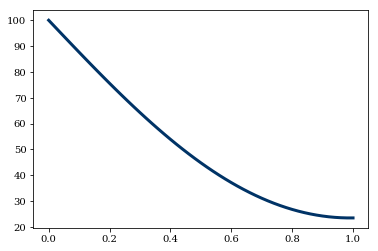

In [10]:
pyplot.plot(numpy.linspace(0,1,nx), T, color='#003366', ls='-', lw=3);

Não muito impressionante, isso se parece com o resultado do caso *explícito* progressivo no tempo, centralizado no espaço para $\alpha\frac{\Delta t}{\Delta x^2}=\frac{1}{2}$.

Mas tente $\alpha\frac{\Delta t}{\Delta x^2}=5$, o que viola a condição de estabilidade do esquema *explícito*:

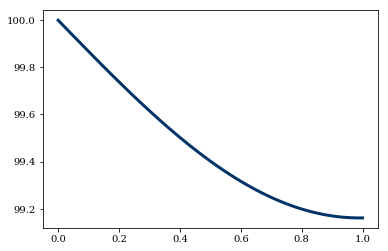

In [11]:
sigma = 5.0

A = generateMatrix(nx, sigma)

T = implicit_btcs(Ti.copy(), A, nt, sigma, qdx)

pyplot.plot(numpy.linspace(0,1,nx), T, color='#003366', ls='-', lw=3);

**Não explodiu!**

Nós não fomos capazes de usar um passo de tempo tão grande com o esquema explícito. Você pode experimentar outros valores de `sigma` e obterá uma solução estável. Na verdade, esse é um esquema *incondicionalmente estável* - o recurso mais valioso dos métodos implícitos é que eles fornecem soluções estáveis sem uma restrição na escolha do passo de tempo.

Usando o esquema implícito, sempre podemos avançar no tempo usando passos de tempo maiores. Mas cada etapa de tempo requer a solução de um sistema linear, que é computacionalmente caro. Esse é o __trade-off__ entre métodos explícitos e implícitos.

<div class="alert alert-danger" role="alert">
  __Atenção!!__
  <br>
  Métodos implícitos permitem que você use passos de tempo significativamente maiores, porque eles não estão sujeitos a restrições de estabilidade. Mas isso não significa que você pode usar apenas um grande intervalo de tempo! Lembre-se de que o método de Euler é um método de primeira ordem, então a _precisão_ fica pior à medida que você aumenta o intervalo de tempo, em proporção direta. Na verdade, você pode perder a capacidade de capturar a física correta se seu intervalo de tempo for muito grande. Estabilidade numérica não implica precisão!
</div>

#### Dig deeper

Você vê como a matriz 'A' está quase cheia de zeros? Chamamos essa matriz de *esparsa* e há muitas maneiras de fazer cálculos mais eficientes aproveitando sua estrutura específica. Primeiro de tudo, você pode otimizar o uso da memória. Confira os [formatos de armazenamento de matriz esparsa] do SciPy (http://docs.scipy.org/doc/scipy-0.14.0/reference/sparse.html): você não precisa de muito armazenamento $(N-2)^2$ elementos! Por exemplo, um formato `coo_matrix` armazena apenas $3*N_\text{nonzero}$, em que $N_\text{nonzero}$ é o número de elementos diferentes de zero em `A`. Certifique-se de explorar este tópico um pouco mais. É um tópico importante em PDEs numéricos.

In [12]:
from IPython.core.display import HTML
css_file = '../styles/custom.css'
HTML(open(css_file, "r").read())